<a href="https://colab.research.google.com/github/thq4n/Learn-Colab/blob/main/DLGC_Working_with_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch
torch.manual_seed(0)
import matplotlib.pyplot as plt

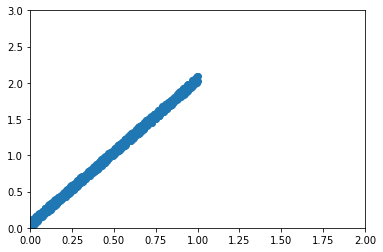

In [47]:
# Data generation and visualization.
x = torch.rand(1000,1)
y = 2 * x + 0.1 * torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.xlim(0,2)
plt.ylim(0,3)
plt.show()


In [48]:
# Network struture:
class MyNNet(torch.nn.Module):
    def __init__(self, n_hidden):
        super(MyNNet, self).__init__()
        self.hidden = torch.nn.Linear(1, n_hidden)  # The single hidden layer
        self.relu = torch.nn.ReLU()                 # activation function
        self.output = torch.nn.Linear(n_hidden, 1)  # output layer

    def forward(self, input):
        out = self.hidden(input)
        out = self.relu(out)
        out = self.output(out)
        return out
    

In [49]:
# Set up a model and training components:
n_epoch = 10
learning_rate = 0.001

model = MyNNet(10)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_func = torch.nn.MSELoss()

In [52]:
# Start traning:
for epoch in range(n_epoch):
    for i in range (x.size()[0]):
        y_pred = model(x[i])
        loss = loss_func(y[i],y_pred)

        optimizer.zero_grad() #clear gradients for next pass
        loss.backward() # backward pass
        optimizer.step() #adjust parameters
    print(f'Epoch {epoch + 1}. Loss: {loss.item():.4f}')


Epoch 1. Loss: 0.0026
Epoch 2. Loss: 0.0027
Epoch 3. Loss: 0.0027
Epoch 4. Loss: 0.0026
Epoch 5. Loss: 0.0026
Epoch 6. Loss: 0.0025
Epoch 7. Loss: 0.0024
Epoch 8. Loss: 0.0023
Epoch 9. Loss: 0.0022
Epoch 10. Loss: 0.0022


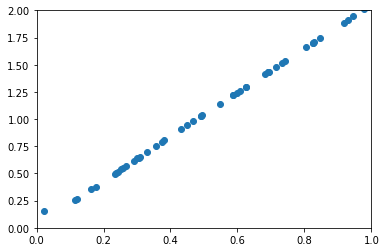

In [53]:
x_test = torch.rand(50, 1)
y_pred = []
with torch.no_grad():
    for i in range(x_test.size()[0]):
        y_pred.append(model(x_test[i]).item())

plt.scatter(x_test.data.numpy(), y_pred)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

In [54]:
for param_tensor in model.state_dict():
    print(param_tensor)
    print(model.state_dict()[param_tensor])
    print()

hidden.weight
tensor([[ 0.5547],
        [ 0.1268],
        [ 0.1526],
        [ 0.6409],
        [ 1.0719],
        [-0.4065],
        [-0.1096],
        [ 0.5849],
        [-0.4846],
        [ 1.3347]])

hidden.bias
tensor([-0.6850,  0.4587, -0.7183,  0.1891,  0.4601,  0.1785, -0.1002,  0.5258,
        -0.7180, -0.1637])

output.weight
tensor([[-0.2695, -0.1413,  0.0082,  0.3121,  0.7014, -0.1201,  0.2632,  0.2047,
         -0.0865,  0.7227]])

output.bias
tensor([-0.2704])



In [55]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Deep Learning with Google Colab/sample.pth')

In [57]:
model = MyNNet(10)
model.load_state_dict(torch.load('/content/drive/MyDrive/Deep Learning with Google Colab/sample.pth'))
model.eval()

MyNNet(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=10, out_features=1, bias=True)
)

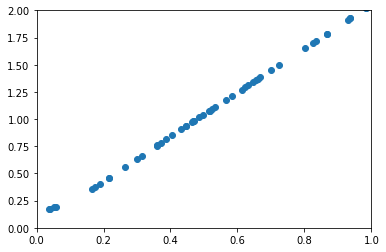

In [62]:
x_test = torch.rand(50, 1)
y_pred = []
with torch.no_grad():
    for i in range(x_test.size()[0]):
        y_pred.append(model(x_test[i]).item())

plt.scatter(x_test.data.numpy(), y_pred)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()